
## Climate Analysis and Exploration

In [1]:
# Setup dependencies and import modules needed for pandas and plotting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [2]:
# Import additional tools needed to connect to and use data from hawaii.sqlite 
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
# Create a variable for the path to the file
#database_path = 'Resources/hawaii.sqlite'
database_path = os.path.join('Resources', 'hawaii.sqlite')

# create engine to hawaii.sqlite
engine = create_engine(f'sqlite:///{database_path}')

In [4]:
# Reflect an existing database into a new model
# Declare the Base and prepare Base class to reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [6]:
# Inspect for viewing tables of the .sqlite file
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View the tables that automap found, starting with 'measurement'
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# View the second table that automap showed, 'station'
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Precipitation Analysis
#### Design a query to retrieve the most recent 12 months of precipitation measurements from the data and plot the results in a Pandas DataFrame

In [11]:
# Find the most recent date in the data set 
# Order by descending dates and find first date in the results
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [12]:
# Calculate the date one year from the last date in data set
year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_prior

datetime.date(2016, 8, 23)

In [13]:
# See as a date
print(year_prior)

2016-08-23


In [14]:
# Perform a query to retrieve the date and precipitation values
sel = [Measurement.date, Measurement.prcp]
results = session.query(*sel).\
    filter(Measurement.date >= year_prior).\
    order_by(Measurement.date.desc()).all()
results

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [15]:
# View in ascending order to see that dates will be from 8/23/2016 through 8/23/2017
results_yr_back_ascending = session.query(*sel).filter(Measurement.date >= year_prior).\
                                     order_by(Measurement.date).all()
results_yr_back_ascending

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['Date of Measurement', 'Precipitation'])
results_df.set_index('Date of Measurement', inplace=True)
results_df

,Precipitation
Date of Measurement,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
...,...
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [17]:
# Sort the dataframe by date (earliest date to most recent date 8/32/2017)
sorted_results_df = results_df.sort_values('Date of Measurement')


# Drop NaN results before plotting
sorted_results_df = sorted_results_df.dropna()
sorted_results_df

,Precipitation
Date of Measurement,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


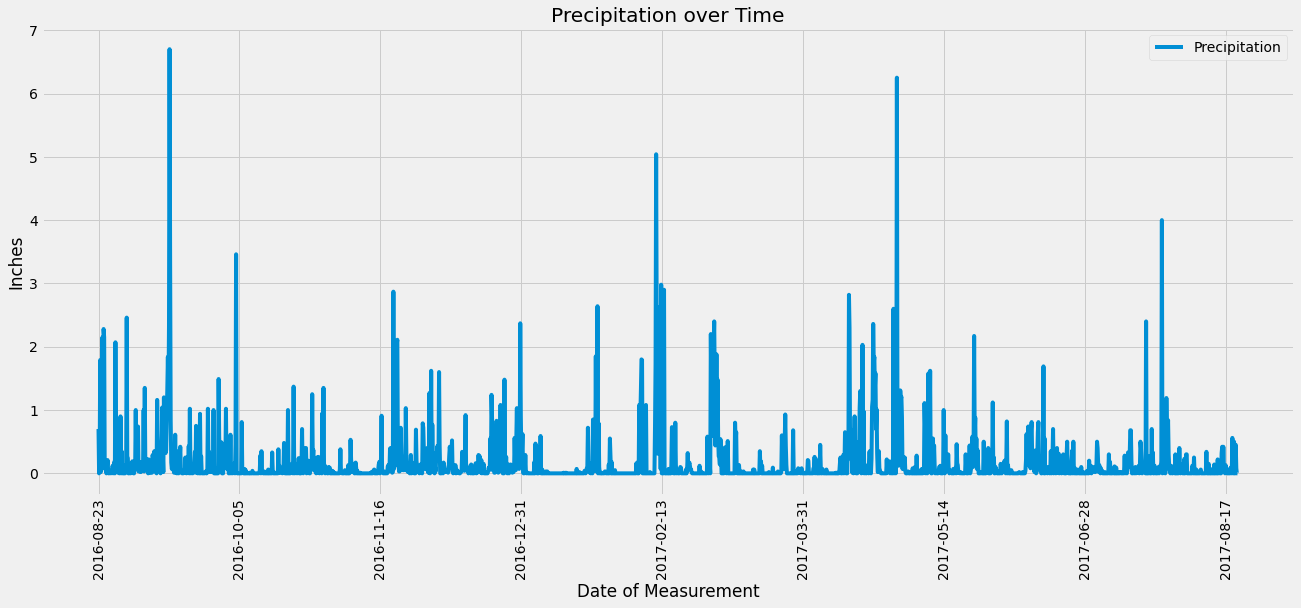

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
sorted_results_df.plot(rot=90, figsize=(20,8))

# Set a title for the chart
plt.title('Precipitation over Time')
plt.ylabel('Inches')
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis
#### Design a query to calculate the total number stations in the dataset

In [20]:
# Examine station results
total_stations_list = session.query(Station.station).all()
total_stations_list
#session.query(Station).count()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# Design a query to calculate the total number stations in the dataset
total_stations_count = session.query(Station.station).count()
print(f'There are a total of {total_stations_count} stations.')

There are a total of 9 stations.


#### Design a query to find the most active station (the station with the most tobs)
* For that station calculate the lowest, highest and average temps.

In [22]:
# Design a query to find the most active stations, and list the stations with counts in descending order
session.query(Measurement.station, func.count()).group_by(Measurement.station).order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Single out the most active station
most_active_station = session.query(Measurement.station, func.count()).\
                                    group_by(Measurement.station).\
                                    order_by(func.count().desc()).first()
print(f'The most active station and the number of temperatures observed is {most_active_station}.')

The most active station and the number of temperatures observed is ('USC00519281', 2772).


In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
selections = [Measurement.station,
              func.count(Measurement.tobs),
              func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)] 
most_active_analysis = session.query(*selections).filter_by(station='USC00519281').all()
most_active_analysis

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067)]

In [25]:
# Break out the results to identify each piece
station_identifier = [result[0] for result in most_active_analysis]
station_min = [result[2] for result in most_active_analysis]
station_max = [result[3] for result in most_active_analysis]
station_avg = [result[4] for result in most_active_analysis]

print(f'Most active station: {station_identifier}\n\
Minimum temperature: {station_min}\n\
Maximum temperature: {station_max}\n\
Average temperature: {station_avg}')

Most active station: ['USC00519281']
Minimum temperature: [54.0]
Maximum temperature: [85.0]
Average temperature: [71.66378066378067]


#### Design a query to retrieve the last 12 months of temperature observation data (TOBS) for the most active station
* Plot the results as histogram with 'bins=12'

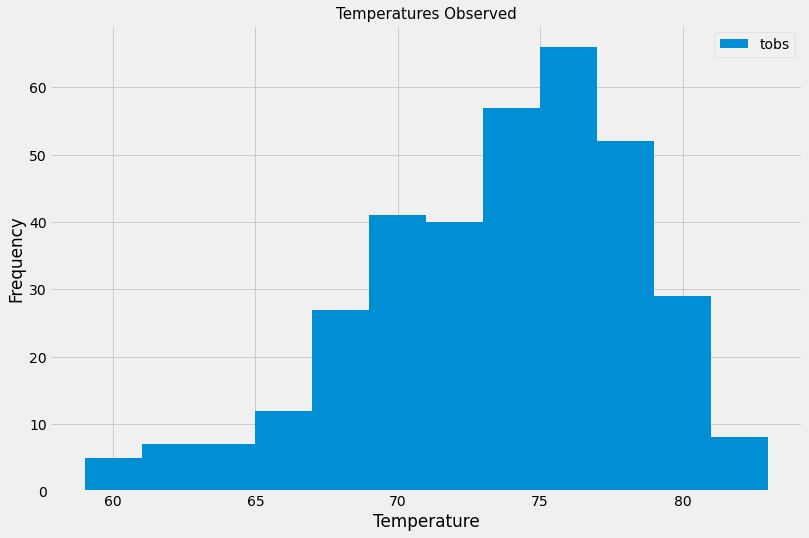

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observations = session.query(Measurement.tobs).filter((Measurement.date > year_prior)&
                                                (Measurement.station == 'USC00519281')).all()
#plt.figure(figsize=(12,8))
pd.DataFrame(observations).hist(figsize=(12,8), bins=12, label='tobs')
results_df = pd.DataFrame(results, columns=['Date of Measurement', 'Precipitation'])
plt.legend()
plt.title('Temperatures Observed', size=15)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Close session

In [27]:
# Close Session
session.close()